In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error
df=pd.read_csv('kc_house_data.csv',encoding = "ISO-8859-1")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

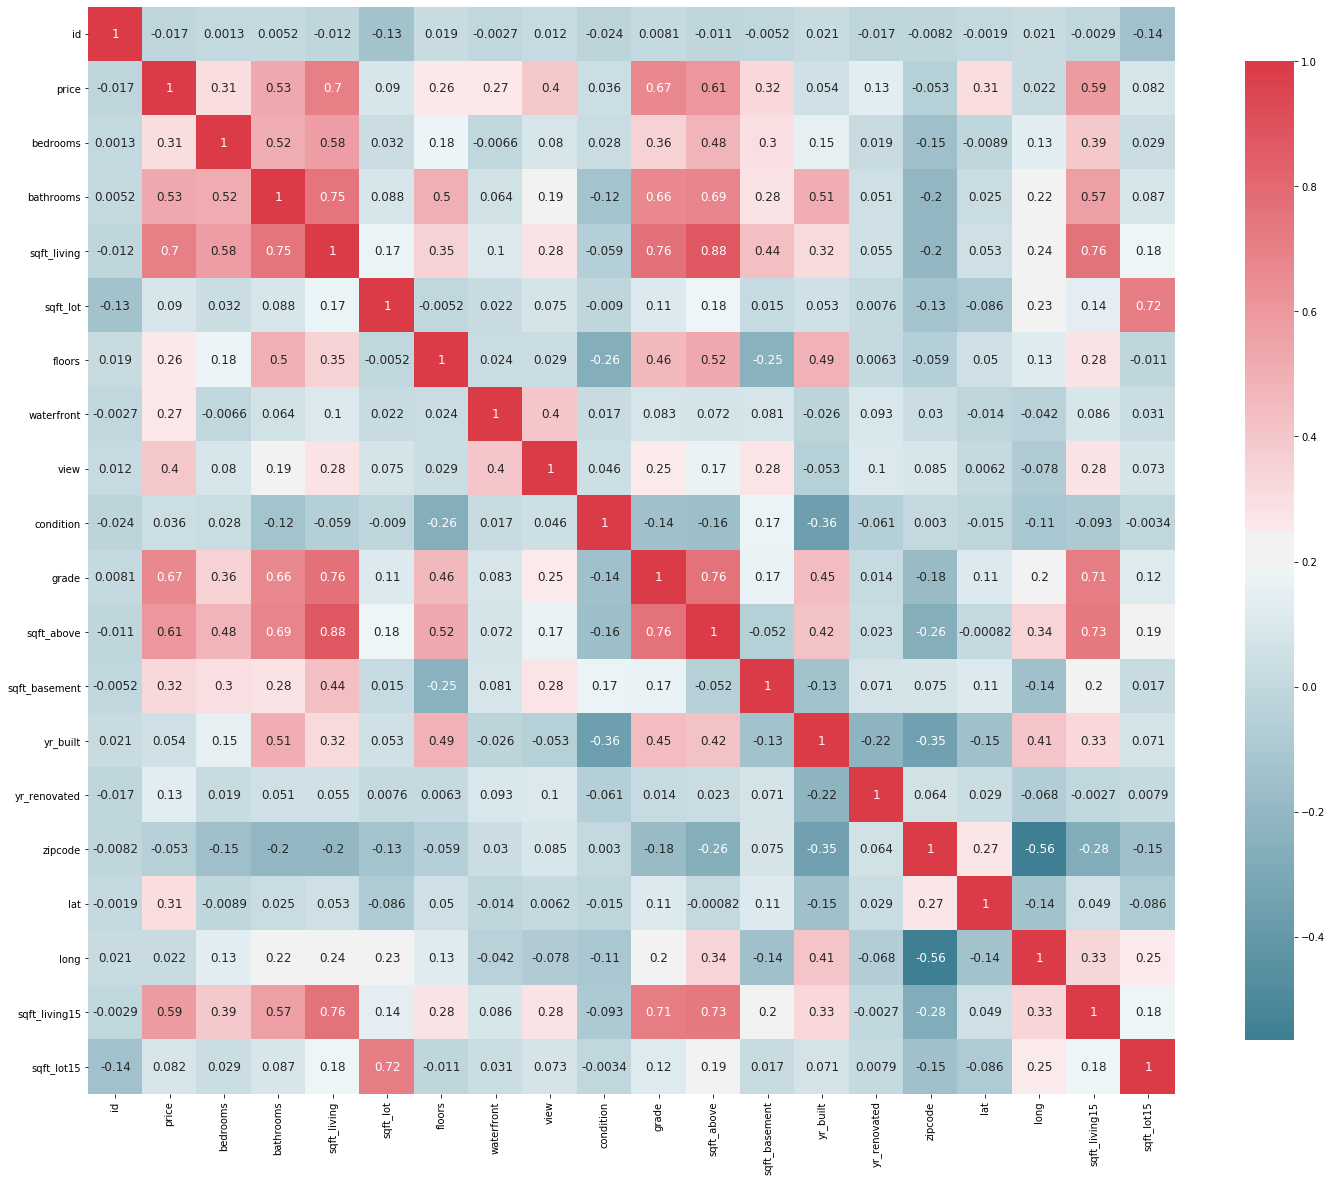

In [8]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 25 , 20) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [10]:
'''In this dataset our target feature is the price so the most important feature is the one that has the closest relationship to the price. According to this map that shows how much is each feature is related to another the most related features to the price are: sqft_living, grade, sqft_above, sqft_living15 and bathrooms which makes them the most important features'''

'In this dataset our target feature is the price so the most important feature is the one that has the closest relationship to the price. According to this map that shows how much is each feature is related to another the most related features to the price are: sqft_living, grade, sqft_above, sqft_living15 and bathrooms which makes them the most important features'

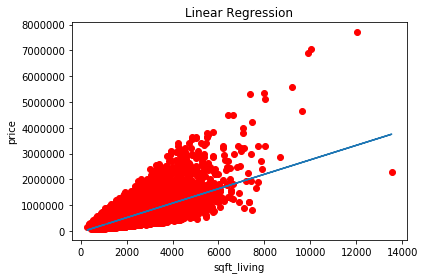

In [78]:
x=df['sqft_living'].values[:,np.newaxis]
y=df['price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
plt.scatter(x,y,color='r')
plt.title("Linear Regression")
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.plot(x,model.predict(x))
plt.show()

In [79]:
print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:", metrics.r2_score(y_test, predicted))
print("accuracy: ", model.score(x_test, y_test))

MSE: 67030931436.53848
R squared: 0.4967402205752728
accuracy:  0.4967402205752728


In [81]:
'''The plot and the results show that there is a low accuracy in the predictions of the price using one feature (sqft_living) '''

'The plot and the results show that there is a low accuracy in the predictions of the price using one feature (sqft_living) '

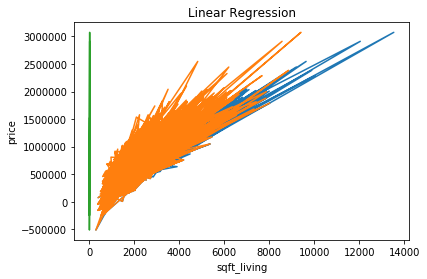

In [66]:
x2= df[["sqft_living","sqft_above","grade"]]
y2 = df["price"].values
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.4, random_state=100)
model2 = LinearRegression()
model2.fit(x2_train, y2_train)
predicted2 = model2.predict(x2_test)
plt.title("Linear Regression")
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.plot(x2,model2.predict(x2))
plt.show()

In [68]:
print("MSE:", mean_squared_error(y2_test,predicted2))
print("R squared:", metrics.r2_score(y2_test, predicted2))
print("accuracy: ", model2.score(x2_test, y2_test))

MSE: 61543969985.739876
R squared: 0.5379356351437726
accuracy:  0.5379356351437726


In [83]:
'''The plot and the results show that there is a better but still low accuracy in the predictions of the price using three features (sqft_living, sqft_above,grade) '''

'The plot and the results show that there is a better but still low accuracy in the predictions of the price using three features (sqft_living, sqft_above,grade) '

In [71]:
x3 = df.drop(['price','date'], axis=1)
y3 = y3 = df["price"].values
x3_train , x3_test ,y3_train , y3_test = train_test_split(x3,y3,test_size=0.3,random_state=40)
model3 = LinearRegression()
model3.fit(x3_train,y3_train)
predicted3 = model3.predict(x3_test)
print("MSE:", mean_squared_error(y3_test,predicted3))
print("R squared:", metrics.r2_score(y3_test, predicted3))
print("accuracy: ", model3.score(x3_test, y3_test))

MSE: 38013372177.04931
R squared: 0.7043052937458134
accuracy:  0.7043052937458134


In [85]:
'''The results show that there is a better accuracy in the predictions of the price when we use more features in the training.'''

'The results show that there is a better accuracy in the predictions of the price when we use more features in the training.'

In [77]:
x4 = df.drop(['price','date'], axis=1)
y4 = y4 = df["price"].values
x4_train , x4_test ,y4_train , y4_test = train_test_split(x4,y4,test_size=0.3,random_state=40)
lg=LinearRegression()
poly = PolynomialFeatures(degree=2)
x4_train_fit=poly.fit_transform(x4_train,x4_test)
lg.fit(x4_train,y4_train)
x4_test_ = poly.fit_transform(x4_test)
predicted4 = lg.predict(x4_test_)
print("MSE:", mean_squared_error(y4_test,predicted4))
print("R squared:", metrics.r2_score(y4_test, predicted4))
print("accuracy: ", lg.score(x4_test, y4_test))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 19 is different from 210)